<a href="https://colab.research.google.com/github/SyedHuzaifa007/Mnist-Handwritten-Digits-Classification-Deep-Learning-Model/blob/main/Mnist_Fashion_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
from keras.datasets import fashion_mnist
from keras import models
from keras import layers

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
len(train_images)

60000

In [8]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [10]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

In [11]:
from keras.utils import to_categorical
test_labels = to_categorical(test_labels)
train_labels = to_categorical(train_labels)

In [26]:
network.fit(train_images, train_labels, epochs=10, batch_size=300)

Epoch 1/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0044 - accuracy: 0.9738
Epoch 2/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0045 - accuracy: 0.9725
Epoch 3/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0045 - accuracy: 0.9724
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0045 - accuracy: 0.9731
Epoch 5/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0044 - accuracy: 0.9736
Epoch 6/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0043 - accuracy: 0.9738
Epoch 7/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0044 - accuracy: 0.9735
Epoch 8/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0044 - accuracy: 0.9740
Epoch 9/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0042 - accuracy: 0.9753
Epoch 10/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0043 - accura

In [27]:
network.predict(test_images)

array([[5.39035555e-17, 3.47749186e-15, 9.35105316e-15, ...,
        9.09078590e-09, 1.87612356e-15, 1.00000000e+00],
       [9.30922362e-17, 5.66418064e-21, 1.00000000e+00, ...,
        9.83408797e-22, 5.27074276e-21, 5.07494435e-26],
       [1.95601634e-15, 1.00000000e+00, 8.64017071e-29, ...,
        8.36644116e-32, 1.66666897e-21, 1.53543181e-35],
       ...,
       [9.22632193e-09, 2.21190620e-21, 3.19625342e-16, ...,
        1.81637779e-14, 1.00000000e+00, 1.07882468e-27],
       [1.00691408e-21, 1.00000000e+00, 1.58349563e-19, ...,
        2.10188562e-25, 5.60362068e-20, 7.49371866e-22],
       [4.90008993e-08, 1.13823465e-10, 1.39682321e-09, ...,
        1.45494175e-06, 5.19148898e-06, 4.22497931e-12]], dtype=float32)

In [34]:
test_accuracy = network.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.8984
Test Accuracy: 0.8984000086784363


TypeError: ignored

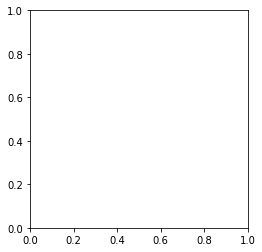

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()